# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

COMPLETA EN ESTA CELDA TU RESPUESTA

Los datos que me ayudaran a trabajar en el problema son:

1. Sector en el que esta ubicado el inmueble (ciudad, barrio, zona)
2. Tipo de inmueble (casa de campo, apartamento, etc)
3. Superficie
4. Comodidades

Con este tipo de información podria calcular el valor de venta de un inmueble. Puedo conseguirlos en el dataframe y en bases externas como google para indagar un poco mas sobre el avaluo de los sectores donde estan construidos los inmuebles.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

2.0. Importa las librerías necesarias para trabajar en la consigna.

In [116]:
#se importan las librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



In [117]:
#En esta función pd.read_csv importamos a pandas como pd el dataframe para poder analisar los datos.
data = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
#La funcion head nos trae las primeras líneas de un archivo en este caso las 5 primeras lineas
data.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?

In [118]:
#La funcion shape nos muestra cuantas filas y cuantas instancias tiene nuestro dataframe.
data.shape

(146660, 19)

In [119]:
#Esta funcion size nos indica cuantos elementos tiene el dataframe.
data.size

2786540

In [120]:
#Es importante saber que tipo de datos tiene el dataframe.
data.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [121]:
#con esta funcion se cuentan las instancias por columnas.
data.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

 **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [122]:
#Se indaga por los valores faltantes por columna y se imprime los resultados
print("Cantidad de valores faltantes por columna para la base data: \n", data.isnull().sum(), sep = "")

Cantidad de valores faltantes por columna para la base data: 
start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [123]:
#Con esta funcion imprimo los nombres de las columnas del dataset
print(list(data.columns))

['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency', 'title', 'description', 'property_type', 'operation_type']


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [124]:
#lo que hace el agrupamiento todos los tipos de propiedades, hace conteo con cada columna.
consolidado = data.groupby('property_type')
consolidado.property_type.count()

property_type
Casa                21521
Casa de campo         322
Cochera               259
Departamento       107326
Depósito              265
Local comercial       325
Lote                 1312
Oficina               658
Otro                  374
PH                  14298
Name: property_type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='property_type'>

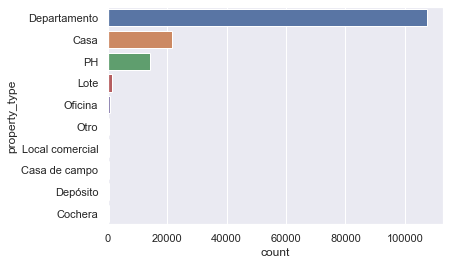

In [125]:
#Con este grafico nos damos cuenta cuales son los tipos mas abundantes en el dataset, departamento,PH, Casa.
#sns.countplot(y='property_type',data=data)
sns.countplot(y = "property_type", data = data, order = data['property_type'].value_counts().index)

***Con este grafico nos damos cuenta que los tipos de propiedad mas abundantes en el dataset son departamento, PH, Casa.***

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [126]:
#se se le hace el agrupamiento por zonas, se calcula la media, min y max de variable precio.
consolidado = round(data.groupby("l2").agg({'price': ['mean', 'min', 'max']}))
consolidado

price                    
                              mean     min         max
l2                                                    
Bs.As. G.B.A. Zona Norte  241529.0  5500.0  11000000.0
Bs.As. G.B.A. Zona Oeste  156329.0  7500.0  11111111.0
Bs.As. G.B.A. Zona Sur    195351.0  8000.0  10920000.0
Capital Federal           261272.0  6000.0  32434232.0

In [127]:
#se se le hace el agrupamiento por barrios, se calcula la media, min y max de variable precio.
consolidado = round(data.groupby("l3").agg({'price': ['mean', 'min', 'max']}))
consolidado

price                     
                      mean      min         max
l3                                             
Abasto            171669.0  40000.0    699000.0
Agronomía         195261.0  68000.0    799000.0
Almagro           180404.0  10800.0   3750000.0
Almirante Brown   243656.0  11000.0   2800000.0
Avellaneda        127272.0  22000.0   1689235.0
...                    ...      ...         ...
Villa Riachuelo   535988.0  60000.0  16294500.0
Villa Santa Rita  162581.0  29900.0    560000.0
Villa Soldati     122472.0  25000.0    400000.0
Villa Urquiza     204978.0  18900.0   2299000.0
Villa del Parque  189488.0  57000.0   5000000.0

[89 rows x 3 columns]

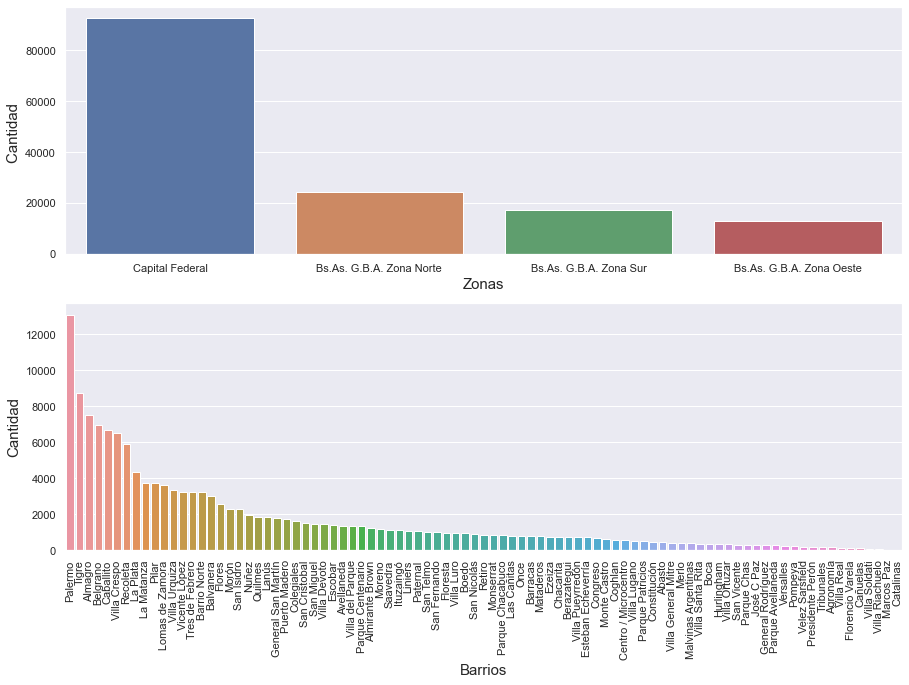

In [128]:
#gráficos de barras para las variables L2 y L3.

plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.countplot(data = data, x = 'l2',order = data['l2'].value_counts().index)
plt.xlabel('Zonas', size = 15)
plt.ylabel('Cantidad ', size = 15)


plt.subplot(2,1,2)
sns.countplot(data = data, x = 'l3', order = data['l3'].value_counts().index)
plt.xticks(rotation= 90)
plt.xlabel('Barrios', size = 15)
plt.ylabel('Cantidad', size = 15)

plt.show()
#sns.countplot(y = "property_type", data = df, order = df['property_type'].value_counts().index)

***Grafico variable L2, se observan las zonas Argentinas Bs.As. G.B.A. Zona Norte, Bs.As. G.B.A. Zona Sur y Bs.As. G.B.A. Zona Oeste, regiones que conforman el [Gran Buenos Aires] ciudades que rodean a la Ciudad de Buenos Aires,con surespectiva cantidad de imuebles, identificando la Capital federal(Ciudad de Buenos Aires) con mayor numero de inmuebles.***


***Grafico variable L3, donde podemos indetificar todos los barrios, siendo Palermo el barrio con mayor catidad de inmuebles***

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [129]:
#se filtra el dataframe con los tipos de propiedad y region indicados.  
tipos=["Departamento","PH","Casa"]
region=["Capital Federal"]
df = data[data.property_type.isin(tipos)  & data.l2.isin(region)] 
print('Checkpoint: ', df.shape)

Checkpoint:  (91485, 19)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:

    a. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    
    b. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    
    c. Lo mismo ocurre con valores de superficie total muy chico.
    
    d. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    
    e. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles.        Puede ser útil un boxplot para determinar un rango razonable.
    
    f. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [130]:
#En este punto quitamos los campos que no son necesarios.
du=df.drop(['lat','lon','l1','l2','l3','start_date','end_date','created_on', 'currency', 'operation_type','title','description','property_type'], axis=1)
du.head(5)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [131]:
#A. Nos muestra las estadisticas de las variables para conocer mas a fondo el nuevo dataset.
du.describe()
#La variable que para mi concepto no tienen mucho sentido son la media porque agrupa todos los valores y 
# nos puede sesgar los datos reales del dataset.


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


(0.0, 700.0)

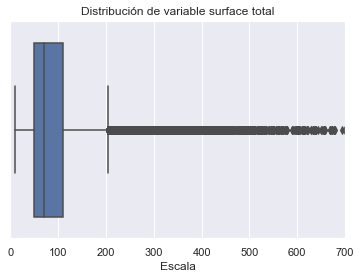

In [132]:
#boxplot para la Distribución de variable surface total.
sns.boxplot(data= du, x = "surface_total")
plt.title('Distribución de variable surface total')
plt.xlabel('Escala')
plt.xlim(0,700) 

***#B Este grafico se evidencia que la variable es asimetrica, se puede evidenciar presencia de datos atipicos.***

En la grafica se evidencia un dato entre 40000 y 60000, dos datos mayores a 10000 y por ultimo un dato mayor a 12000, estos datos nos dificultan la correcta visualizacion.

In [133]:
#se calcula el rango intercuartil para desechar los datos atipicos mas pequeños y los atipicos mas grandes de la variable 
# surface_total.

Q1 = du.surface_total.quantile (0.25) 
Q3 = du.surface_total.quantile (0.75) 
RQ = Q3 - Q1  
LI = Q1-(RQ*1.5)
LS = Q3+(RQ*1.5)
print (Q1)
print (Q3)
print (LI)
print (LS)
print (RQ) 

49.0
111.0
-44.0
204.0
62.0


In [134]:
# En la variable mascara filtramos los valores que son menores de limite superior y en el nuevo dataframe dp traemos los nuevos 
# datos que corresponden al nuevo dato que filtra la mascara.

mascara = du['surface_total'] < LS
dp=du[mascara]
dp.shape

(76236, 6)

<AxesSubplot:xlabel='surface_total'>

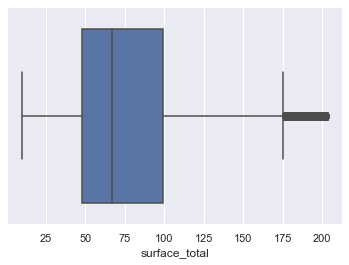

In [135]:
# En este grafico se puede evidenciar los datos comprensibles de la variable surface total con los datos filtrados del 
# limite superior.
sns.boxplot(data= dp, x = "surface_total")

***Se calcula el rango intercuartil del limite superior y limite inferior para eliminar los datos atipicos y se crea un nuevo dataframe. Se puede observar la normalidad de los datos***

In [136]:
#C Se hace lo mismo que en el paso anterior pero tomando los datos del limite inferior, para limpiar el dataset.

mascara = du['surface_total'] > LI
dp=du[mascara]
dp.shape

(82568, 6)

(0.0, 1000.0)

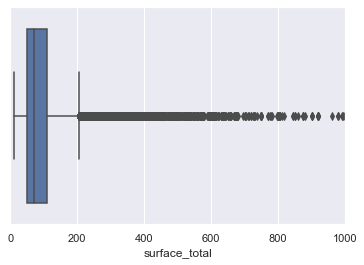

In [137]:
#Se grafica de forma entendible los datos del limite inferior.
sns.boxplot(data= dp, x = "surface_total")
plt.xlim(0,1000)

***#C Se le aplica filtro a la variable surface_total tomando los datos del limite inferior para tratar los datos atipicos mas pequeños, se limpia el dataset.***


In [138]:
#D Se filtan los datos para que la variable surface_covered sea menor al surface_total.
mascara2 = dp['surface_covered'] < dp['surface_total']
dp1 = dp[mascara2]
dp1.head(5)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,2.0,1.0,2.0,70.0,58.0,159000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
8,1.0,1.0,1.0,45.0,37.0,89000.0
9,1.0,1.0,1.0,45.0,37.0,89000.0
10,2.0,1.0,2.0,66.0,49.0,170000.0


In [139]:
#E se calcula el rango intercuartil para desechar los datos atipicos mas pequeños y los atipicos mas grandes de la variable 
# price.
Q1 = du.price.quantile (0.25) 
Q3 = du.price.quantile (0.75) 
RQ = Q3 - Q1  
LI = Q1-(RQ*1.5)
LS = Q3+(RQ*1.5)
print (Q1)
print (Q3)
print (LI)
print (LS)
print (RQ) 

120000.0
279000.0
-118500.0
517500.0
159000.0


In [140]:
#se aplica mascara a la variable price
mascara = du['price'] < LS
dp=du[mascara]
dp.shape

(83960, 6)

(0.0, 517500.0)

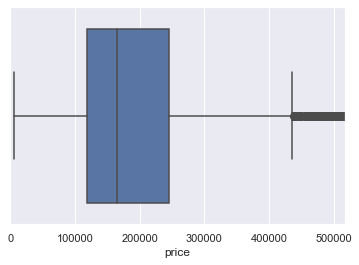

In [141]:
#se evidencia la grafica de forma mas optima sin datos atipicos.
sns.boxplot(data= dp, x = "price")
plt.xlim(0,517500)

***D despues de aplicar el rango intercuartil y aplicar los filtros a la variable price para que los valores quedan en un rango razonable, Se puede observar la normalidad de los datos.***

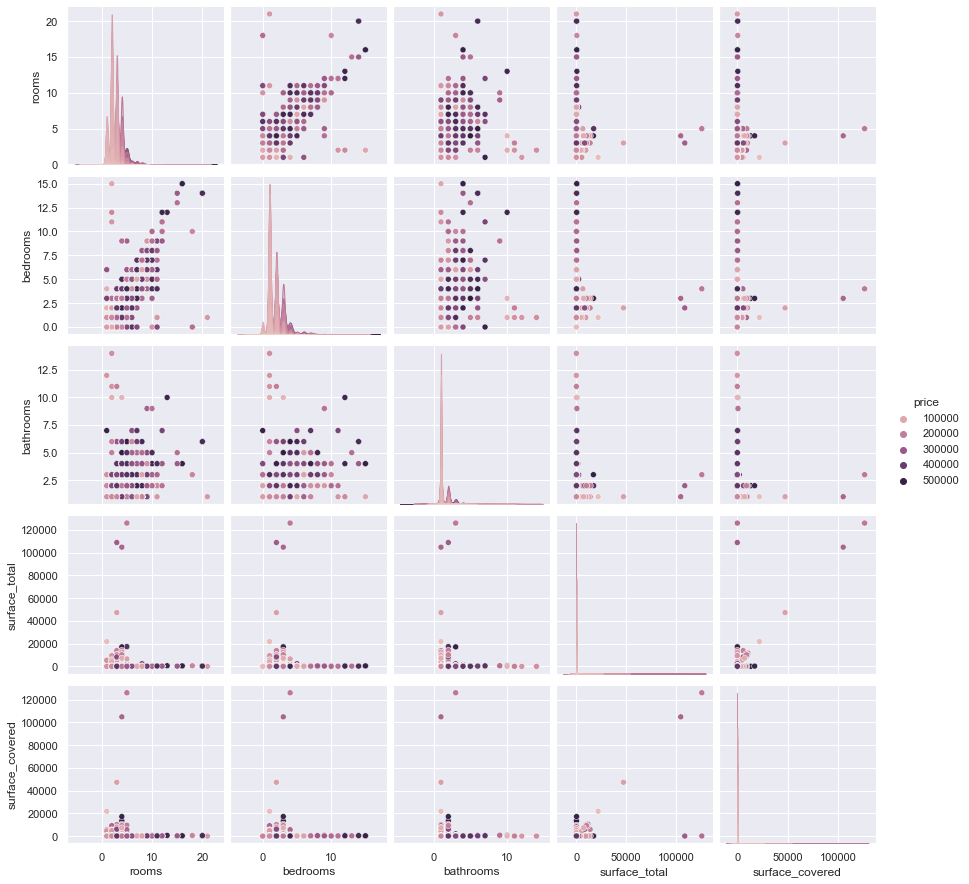

In [142]:
#Se hace la correlacion entre la variable precio con las demas variables y podemos evidenciar que las que 
# mas se correlacionan son surface_covered con surface_total respecto a variable precio.
sns.pairplot(dp, hue= 'price')

***Se hace la correlacion entre la variable precio con las demas variables y podemos evidenciar que las que 
mas se correlacionan son surface_covered con surface_total respecto a variable precio.***

7. Correlaciones: Estudia la correlación entre las variables rooms, bedrooms, bathrooms, surface_total, surface_covered, price. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [143]:
#Que nos ayuda a identificar qué variables nos sirven para nuestro modelo lineal y cuales no, y mide la relacion 
#entre dos variables
du.corr(method='pearson')

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.927300,0.603174,0.064774,0.066757,0.448318
bedrooms,0.927300,1.000000,0.603968,0.064468,0.066174,0.413555
bathrooms,0.603174,0.603968,1.000000,0.056524,0.058192,0.587724
surface_total,0.064774,0.064468,0.056524,1.000000,0.770742,0.049071
surface_covered,0.066757,0.066174,0.058192,0.770742,1.000000,0.054534
price,0.448318,0.413555,0.587724,0.049071,0.054534,1.000000


<AxesSubplot:title={'center':'Mapa de calor entre las variables estudiadas'}>

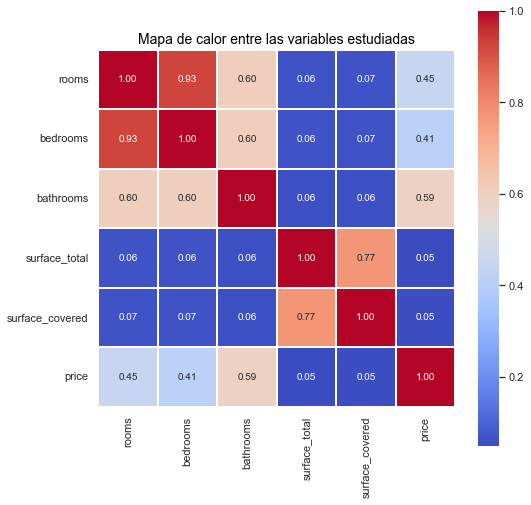

In [144]:
#mapa de calor, en este grafico podemos observar todas las variables y evidenciamos las variables que mas se correlacionan
#son bathrooms y bedrooms con la variable precio.
corr = du.corr()
plt.figure(figsize=(8,8))
plt.title('Mapa de calor entre las variables estudiadas', fontsize=14, color="black")
sns.heatmap(corr, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws={'size': 10}, cmap= 'coolwarm', linewidths = 1.5)

***Mapa de calor, en este grafico podemos observar todas las variables y evidenciamos las variables que mas se correlacionan
son bathrooms y bedrooms con la variable precio, ya que son las mas cercanas a 1.***




2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.




In [145]:
#valor metro cuadrado mas caro por barrio, el pivot table nos permite generar un agrupamiento.

print ('Barrios mas caros por metro cuadrado')
table = data.pivot_table( values='price', index=['l3'], aggfunc = np.mean)
caros = table.sort_values('price', ascending=False).iloc[:5]
caros

Barrios mas caros por metro cuadrado


,price
l3,
Puerto Madero,984679.031303
Villa Riachuelo,535988.071429
Las Cañitas,469045.204056
Recoleta,410252.230184
Belgrano,376293.661283


In [146]:
# La funcion sort_values ordenamos el precio de la forma ascendente.
# En este punto nos indica los 5 barrios mas baratos por metro cuadrado

print ('Barrios mas baratos por metro cuadrado')
baratos = table.sort_values('price', ascending=True).iloc[:5]
baratos

Barrios mas baratos por metro cuadrado


,price
l3,
José C Paz,91501.874564
Constitución,104534.073840
Villa Soldati,122472.463768
Avellaneda,127272.403650
Boca,128428.273504


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [148]:
# Se filtra el dataset con los datos sugeridos en el ejercicio
data_final2 = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') 
dp3 = data_final2[(data_final2['l2'] == "Capital Federal") & (data_final2.property_type.isin(['Departamento','Casa','PH']))]
dp3 = dp3[(dp3['surface_total'] >= 15) & (dp3['surface_total'] <= 1000)]
dp3 = dp3[(dp3['price'] <= 4000000)]
dp3 = dp3.filter(items=['rooms', 'bedrooms','bathrooms','surface_total', 'surface_covered', 'price'])
dp3 = dp3.dropna()

dp3.head(5)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [149]:
print('Checkpoint: ', dp3.shape)

Checkpoint:  (81019, 6)


Separo de dataframe dos atributos y las etiquetas. Llamar X a los features e y a las etiquetas.

In [150]:
#vecinos más cercanos para predecir el precio de las propiedades tipo Departamento, PH y Casa en la Ciudad 
# Autónoma de Buenos Aires (Capital Federal) modelo de regresion me devuelve un valor.
x= dp3[['rooms','bathrooms','bathrooms','surface_covered']]
y= dp3[['price']]

In [151]:
#nos imprime las primeras 5 lineas.
x.head()

,rooms,bathrooms,bathrooms,surface_covered
0,7.0,2.0,2.0,140.0
1,2.0,2.0,2.0,58.0
2,2.0,1.0,1.0,45.0
3,2.0,1.0,1.0,50.0
5,2.0,1.0,1.0,56.0


In [152]:
#nos muestra que cantidad de propiedades tienen ese mismo precio.
y.value_counts()

price   
125000.0    1162
120000.0    1084
115000.0    1071
145000.0    1004
110000.0    1000
            ... 
228984.0       1
228681.0       1
228600.0       1
228542.0       1
200628.0       1
Length: 3692, dtype: int64

In [153]:
#Aqui alimentamos con valores aleatorios las variables a predecir con los tres tipos de modelos.
#Realizar un Train/Test split de los datos.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 4) (56713, 1) (24306, 4) (24306, 1)


***Ya que toda prediccion que se haga va a tener un error asociado en este caso se utiliza la metrica RMSE para  evaluar los modelos ya que en este tipo de regresion se trata de predecir precios, mientras menor sea nuestro RMSE mejor sera nuestro modelo.
El MAE nos calcula el error absoluto medio, sirve para cuantificar la precisión de una técnica de predicción comparando con los valores predichos frente a los observados***

Modelo 1 Regresion Lineal.

In [173]:
# se crea el modelo de regresion lineal
model = LinearRegression()

# se entrena el modelo
model.fit(X_train, y_train)

#modelo Benchmark
y_pred_train = model.predict(X_train)

#en este punto generamos la predeccion el modelo
y_pred_test =  model.predict(X_test)

#en este punto aplico la metrica de medicion RMSE (RAIZ DEL ERROR CUADRATICO MEDIO)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
print('El error absoluto medio :', int(mean_absolute_error(y_test,y_pred_test)))

Raíz del error cuadrático medio en Train: 223040.3374235132
Raíz del error cuadrático medio en Test: 230365.60605619833
El error absoluto medio : 107863


Modelo 2 Arbol de decision.

árboles de decisión para predecir el precio de las propiedades tipo Departamento, PH y Casa en la Ciudad 
Autónoma de Buenos Aires (Capital Federal).

In [172]:
#DecisionTreeRegressor Benchmark
#Se crea el modelo de arbol de decision con profundidad de 3
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

#se entrena el arbol
tree_regressor.fit(X_train, y_train)

#se hace la prediccion de los datos con la variable de entrenamiento y la variable de prediccion
y_train_pred_dt = tree_regressor.predict(X_train)
y_test_pred_dt = tree_regressor.predict(X_test)

##en este punto aplico la metrica de medicion RMSE (RAIZ DEL ERROR CUADRATICO MEDIO)
rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_dt}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_dt}')
print('El error absoluto medio :', int(mean_absolute_error(y_test, y_test_pred_dt)))

Raíz del error cuadrático medio en Train: 191919.9519344049
Raíz del error cuadrático medio en Test: 194793.09437153878
El error absoluto medio : 92712


In [156]:
#iteracion para arbol de desicion.

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

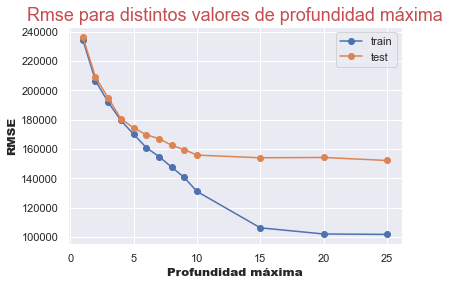

In [157]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")


***En el grafico anterior Rmse de profundidan maxima podemos evidenciar que el punto mas optimo para el analisis de los datos para testear y predecir es el de profundida 8.***

In [167]:
dtree = DecisionTreeRegressor(max_depth = 8,  random_state=42)

dtree.fit(X_train, y_train)

y_Train_Pred = dtree.predict(X_train)
y_Test_Pred  = dtree.predict(X_test)

y_Train_Pred=y_Train_Pred.reshape(56713, 1)
y_Test_Pred=y_Test_Pred.reshape(24306, 1)

# para entender los datos debemos quitar la cifra dada la cual esta elevada al cuadrado, por tal motivo hacemos rmse 
# sacamos raiz cuadra = .sqrt
rmse_train = np.sqrt(mean_squared_error(y_train, y_Train_Pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_Test_Pred))

# imprimimos el error cuadratico en test y train en arboles de desiciones y tambien la exactitud de nuestro modelo.
print('Arbol de decisión la Raíz del error cuadrático medio en Train:', int(rmse_train))
print('Arbol de decisión la Raíz del error cuadrático medio en Test:', int(rmse_test))
print('El error absoluto medio :', int(mean_absolute_error(y_test, y_Test_Pred)))


Arbol de decisión la Raíz del error cuadrático medio en Train: 147684
Arbol de decisión la Raíz del error cuadrático medio en Test: 162787
El error absoluto medio : 74347


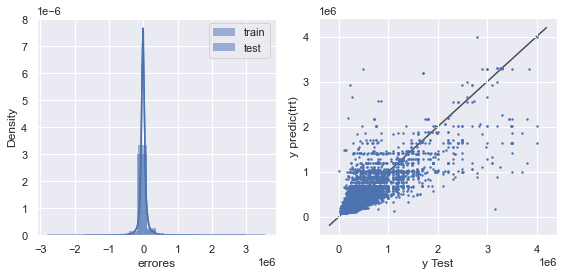

In [168]:
# se hace un histograma para graficar el modelo de Arbol de decision.

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot( y_train - y_Train_Pred,  bins = 20, label = 'train', kde=True, stat="density", linewidth=0, color = "r")
sns.histplot(y_test - y_Test_Pred, bins = 20, label = 'test', kde=True, stat="density", linewidth=0, color = "b" )
plt.xlabel('errores')
plt.legend()

# se grafica el modelo para observar como testea y predice.
ax = plt.subplot(1,2,2)
ax.scatter(y_test, y_Test_Pred, s = 2)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
ax.plot(lims, lims, 'k-', alpha= 0.75, zorder= 0)
plt.xlabel('y Test')
plt.ylabel('y predic(trt)')

plt.tight_layout()
plt.show()

***En el modelo de arbol de decision con profundidad 8, se observa que en los resultados del error la diferencia es minima entre test y train.***

Modelo 3 KNN vecinos mas cercanos.

C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


Raíz del error cuadrático medio en Train: 145765.32835992266
Raíz del error cuadrático medio en Test: 165259.19131839596


C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Target predicho')

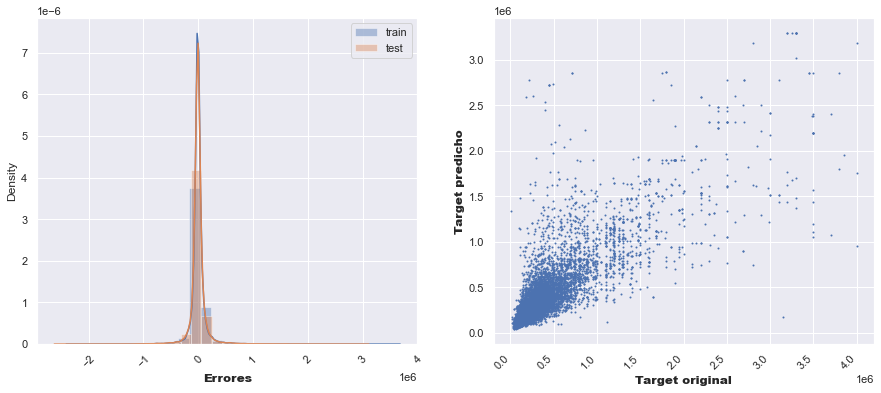

In [160]:
#Modelo KNN vecinos mas cercanos benchmark.
KNN_model = KNeighborsRegressor(n_neighbors = 10)
KNN_model.fit(X_train,y_train)
y_test_pred = KNN_model.predict(X_test)
y_train_pred = KNN_model.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)

plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Target original", fontweight = "black", fontsize = 12)
plt.ylabel("Target predicho", fontweight = "black", fontsize = 12)

***En el grafico anterior podemos evidenciar que todos los datos estan sobre cero, la varianza esta muy cerca a cero y la comparativa entre el target original y elpredicho los datos no se encuentran tan dispersos.***

C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Rmse para distintos valores de vecinos mas cercanos')

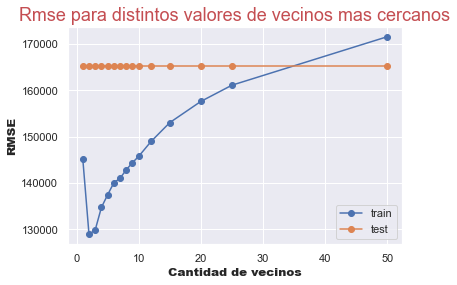

In [161]:
#iteramos con diferentes k vecinos.

lista_rmse_train = []
lista_rmse_test = []

n_neighbor = [1,2,3,4,5,6,7,8,9,10,12,15,20,25,50]


for i in n_neighbor:
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    y_test_pred = KNN_model.predict(X_test)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
   
plt.plot(n_neighbor, lista_rmse_train,'o-',label='train' )
plt.plot(n_neighbor, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Cantidad de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de vecinos mas cercanos", fontsize = 18, color = "r")

***En el grafico anterior Rmse de distancia KNN vecinos podemos evidenciar que el punto mas optimo para el analisis de los datos para testear y predecir es en el punto 25.***

C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


Raíz del error cuadrático medio en Train: 153039.75779023516
Raíz del error cuadrático medio en Test: 170267.5290930841


C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Target predicho')

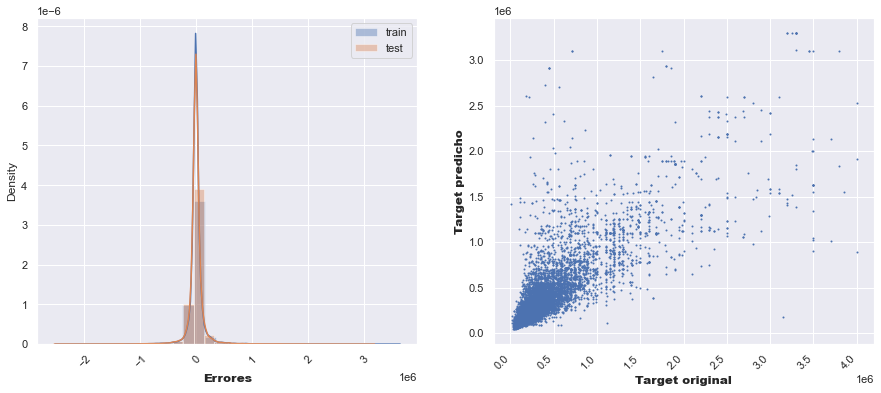

In [162]:
#Modelo KNN vecinos mas cercanos definitivos.

KNN_model = KNeighborsRegressor(n_neighbors = 15)
KNN_model.fit(X_train,y_train)
y_test_pred = KNN_model.predict(X_test)
y_train_pred = KNN_model.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)

plt.scatter(y_test, y_test_pred, s=1)
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Target original", fontweight = "black", fontsize = 12)
plt.ylabel("Target predicho", fontweight = "black", fontsize = 12)

En el grafico anterior podemos evidenciar que todos los datos estan sobre cero, la varianza esta muy cerca a cero.
en el grafico de densidad muestra los datos originales vs los datos predichos y muestra que los datos estan agrupados pero algunos estan dispersos.

C:\Users\Administrador\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


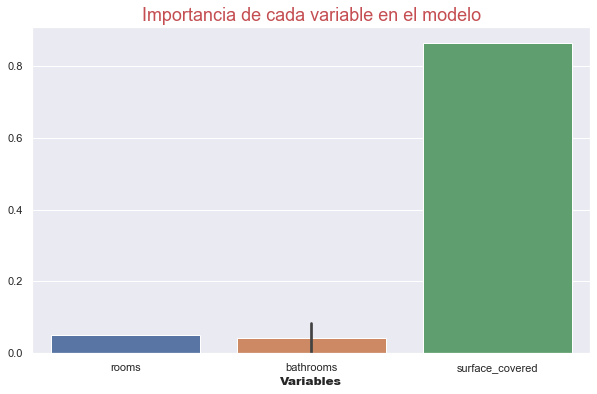

In [163]:
Modelo_completo = DecisionTreeRegressor(max_depth = 4)
Modelo_completo.fit(X_train,y_train)
y_test_pred = Modelo_completo.predict(X_test)
y_train_pred = Modelo_completo.predict(X_train)

importances = Modelo_completo.feature_importances_
columns = X_train.columns

plt.figure(figsize = (10, 6))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.show()

Este grafico nos indica de las tres variables cual es la mas importante, en este caso la mas importante seria surface_covered.

SELECCION DE MODELO:

1) Escojo el modelo de vecinos mas cercanos ya que podemos observar que en el punto 25 el modelo testea y predice muy bien con
las variables escogidas rooms','bathrooms','bathrooms','surface_covered, nos indica que generan un gran impacto referente al precio de la vivienda.


MEJORA DEL MODELO O FALLAS:

1) Mejorar hiperparametros.
2) Mejor tratamiento de datos faltantes.
3) Creacion de diferentes parametros para indagar sobre como es el comportamiento de los datos, para su posible mejora.